## Assessment Title: Integrated CA 

## Lecturer Name: David McQuaid & Muhammad Iqbal

## Student Full Name & Student ID:  Deniz OZSOY UGUR - 2023195 

## IRELAND FUTURE YEARS RAINFALL FORECAST WITH DEEP LEARNING

The data set shows monthly rainfall in Ireland from June 1941 to May 2023. The dataset was downloaded from https://data.gov.ie/dataset/dublin-ringsend-rainfall-data?package_type=dataset

### Link to Dataset

https://data.gov.ie/dataset/dublin-ringsend-rainfall-data?package_type=dataset

### GitHub Repository: 

CCT-Dublin Link:

https://github.com/CCT-Dublin/adv-data-big-data-ft-ca1-denizozsoyugur

The link used since the beginning of the project:

https://github.com/denizozsoyugur/2023195_Integrated_CA

## Inital Data Processing

In [1]:
#pip install dash dash-core-components dash-html-components dash-table plotly

In [2]:
#pip install dash-bootstrap-components

In [3]:
#pip install plotly

In [4]:
#pip install pandas

In [5]:
#pip install --upgrade transformers

In [6]:
#pip install numpy==1.24.0

In [7]:
# Import NumPy, Pandas, Matplotlib, Seaborn libraries and Plotly Express

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

from dateutil.parser import parse 
import matplotlib as mpl
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

from pyspark import SparkConf
from pyspark.conf import SparkConf

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import dash
from dash.dependencies import Input, Output
from sklearn.metrics import mean_squared_error
import plotly.express as px
from dash import Dash, dcc, html

In [9]:
# Import warnings and apply filterwarnings to ignore them.

import warnings
warnings.filterwarnings('ignore')

In [10]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("2023195_Integrated_Ca") \
    .getOrCreate()


24/04/03 03:46:04 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [11]:
#spark-submit my_spark_script.py

In [12]:
df = pd.read_csv("irish_monthly_rainy_weather.csv")

# pd.read_csv function in order to read the csv file

In [13]:
df.head(5)

#  Print the first 5 rows of the dataframe by applying the.head() function

,year,month,ind,rain,gdf,rd,wd
0,1941,1,0,112.8,13,18,18
1,1941,2,0,69.5,13,22,15
2,1941,3,0,111,50,21,13
3,1941,4,0,68.6,16.5,15,12
4,1941,5,0,66.4,20.1,13,10


In [14]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

df= pd.read_csv('irish_monthly_rainy_weather.csv',na_values=missing_values)

# Create a list with all the possible missing value formats. Create a name for the dataframe as report
# ('irish_monthly_rainy_weather')and apply the pd.read_csv function 
# Include the variable 'na_values' and define it with the 'missing values' list previously created

In [15]:
df.isnull().sum()

# Check missing values by applying the .isnull().sum method to the dataframe

year       0
month      0
ind        0
rain      50
gdf      104
rd        91
wd        91
dtype: int64

In [16]:
df.isnull().sum() / len(df) * 100

# Check missing values by applying the .isnull().sum method to the dataframe and divide it by the length of the dataframe,
# calculated with the len() function. Then, multiply the result * 100 to obtain a percentage

year      0.000000
month     0.000000
ind       0.000000
rain      5.192108
gdf      10.799585
rd        9.449637
wd        9.449637
dtype: float64

In [17]:
df.columns

# Check the column names of the dataframe by applying the .columns attribute

Index(['year', 'month', 'ind', 'rain', 'gdf', 'rd', 'wd'], dtype='object')

## Explanation of Abbreviations

The data set includes the amount of precipitation (mm), specified by month. We can also make predictions accordingly.

In [18]:
df.rename(columns={'year':'Year', 
                   'month':'Month', 'ind':'Indicator','rain':'Precipitation_Amount','gdf':'Greatest_Daily_Fall',
                   'rd':'Number_of_Rainy_Days', 'wd':'Number_of_Wet_Days'}, inplace=True)

# Rename the columns of the dataframe by applying the .rename() method

In [19]:
df.drop(columns=["Indicator"], inplace=True)

# Apply .drop() to remove the column as it contains the same index values

In [20]:
df.head(2)

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days
0,1941,1,112.8,13.0,18.0,18.0
1,1941,2,69.5,13.0,22.0,15.0


A rainy day is a day when there is at least 1 millimeter of liquid or liquid equivalent precipitation. The chances of rainy days in Dublin vary throughout the year. Let's examine it accordingly.

In [21]:
# I am creating a list of the columns to convert. These columns currently contain an object data type
# and missing values. To convert them, missing values will be replaced with '0'. Afterwards,
# the values will be converted from object to numeric to utilise all the features that apply to numeric data types

cols_to_convert = ['Year','Month','Precipitation_Amount',
                   'Greatest_Daily_Fall',
                   'Number_of_Rainy_Days','Number_of_Wet_Days']

In [22]:
# Fill the missing values with 0 for the specified columns by applying the .fillna() method

df[cols_to_convert] = df[cols_to_convert].fillna(0)

In [23]:
# Calculating the percentage of missing values in each column obtained by applying the isnull().sum() method to the
#social_housing dataframe and dividing the result by the total number of rows within the dataframe, whose number is obtained by
# applying the .len() function.

df.isnull().sum()/len(df)*100

Year                    0.0
Month                   0.0
Precipitation_Amount    0.0
Greatest_Daily_Fall     0.0
Number_of_Rainy_Days    0.0
Number_of_Wet_Days      0.0
dtype: float64

In [24]:
# Converting the specified columns from object to integer data type by applying the .astype() method

df[cols_to_convert] = df[cols_to_convert].astype(int)

In [25]:
# Displaying the summary information of the dataframe by applying the .info() method

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year                  963 non-null    int64
 1   Month                 963 non-null    int64
 2   Precipitation_Amount  963 non-null    int64
 3   Greatest_Daily_Fall   963 non-null    int64
 4   Number_of_Rainy_Days  963 non-null    int64
 5   Number_of_Wet_Days    963 non-null    int64
dtypes: int64(6)
memory usage: 45.3 KB


In [26]:
df.isnull().sum()

Year                    0
Month                   0
Precipitation_Amount    0
Greatest_Daily_Fall     0
Number_of_Rainy_Days    0
Number_of_Wet_Days      0
dtype: int64

In [27]:
df.shape

(963, 6)

In [28]:
df.head(5)

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days
0,1941,1,112,13,18,18
1,1941,2,69,13,22,15
2,1941,3,111,50,21,13
3,1941,4,68,16,15,12
4,1941,5,66,20,13,10


### Let's observe the course of data by month from 1941 to 2023.

In [29]:
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month']. astype(str), format='%Y-%m')

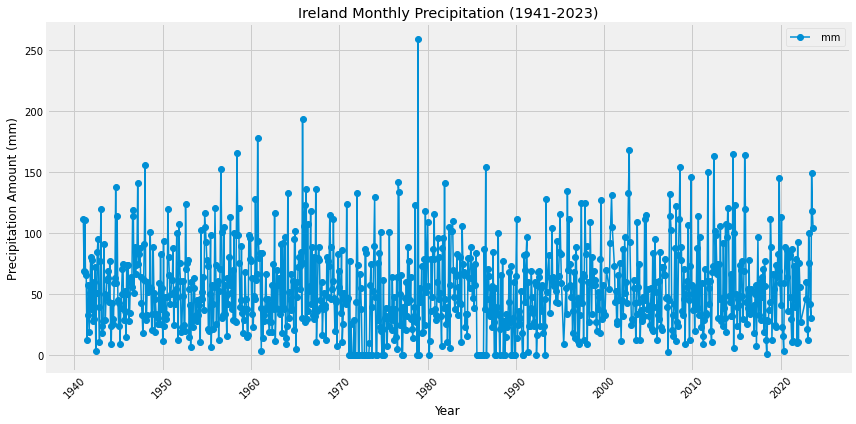

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'].values, df['Precipitation_Amount'].values, label=' mm', marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Precipitation Amount (mm)')
plt.title('Ireland Monthly Precipitation (1941-2023)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
df['Number_of_Rainy_Days'] = df['Number_of_Rainy_Days'].fillna(0)
df['Number_of_Rainy_Days'] = pd.to_numeric(df['Number_of_Rainy_Days'], errors='coerce')

In [32]:
#pip install numpy

In [33]:
#pip install pandas matplotlib

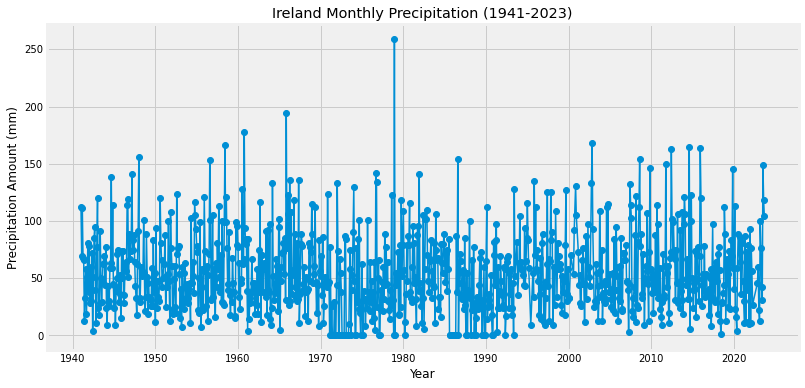

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'].to_numpy(), df['Precipitation_Amount'].to_numpy(), label=' mm', marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Precipitation Amount (mm)')
plt.title('Ireland Monthly Precipitation (1941-2023)')
plt.show()

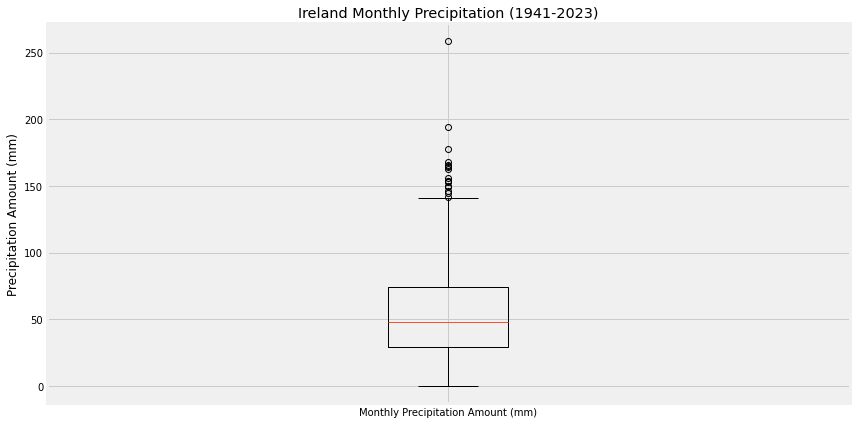

In [35]:
plt.figure(figsize=(12,6))
plt.boxplot(df['Precipitation_Amount'], labels=['Monthly Precipitation Amount (mm)'])

plt.ylabel('Precipitation Amount (mm)')
plt.title('Ireland Monthly Precipitation (1941-2023)')

plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
#Checking the description of data in our dataframe
df.describe()

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days,date
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963
mean,1981.166147,6.484943,53.791277,13.298027,13.149533,9.471443,1981-08-15 13:25:58.878504704
min,1941.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1941-01-01 00:00:00
25%,1961.000000,3.000000,29.000000,7.000000,10.000000,6.000000,1961-01-16 12:00:00
50%,1981.000000,6.000000,48.000000,11.000000,14.000000,10.000000,1981-02-01 00:00:00
75%,2002.000000,9.500000,74.000000,18.000000,17.500000,13.000000,2002-10-16 12:00:00
max,2023.000000,12.000000,259.000000,80.000000,29.000000,24.000000,2023-09-01 00:00:00
std,23.848870,3.462380,34.935061,10.423639,6.335268,5.036041,NaN


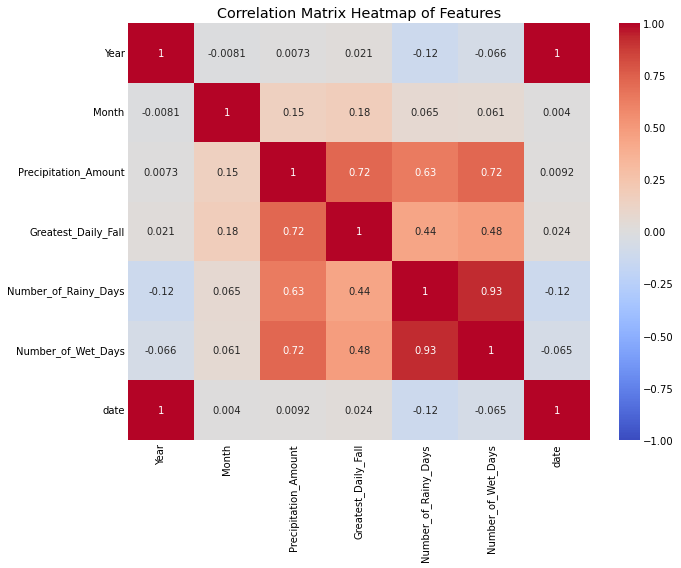

In [37]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap of Features')
plt.tight_layout()
plt.show()

There is no specific correlation between the relevant data, accordingly we can make predictions with year data. The dependent variable 'Precipitation Amount' column was chosen as there is no correlation between the data and in order to make a more accurate prediction.

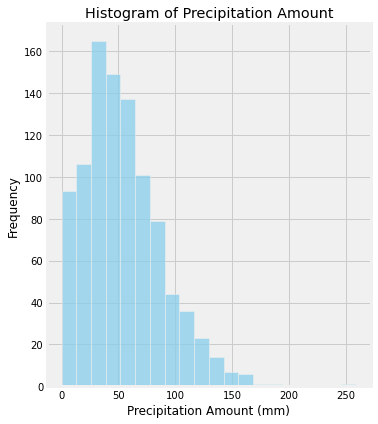

In [38]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Precipitation_Amount'], bins=20, kde=False, color='skyblue')
plt.xlabel('Precipitation Amount (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation Amount')

plt.tight_layout()
plt.show()

In [39]:
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

max_rain_per_year = df.groupby('Year')['Precipitation_Amount'].idxmax()

max_rain_months = df.loc[max_rain_per_year, ['Year', 'Month', 'Precipitation_Amount']]

max_rain_months.reset_index(drop=True, inplace=True)


In [40]:
max_rain_months.to_csv('max_rain_months.csv', index=False)

In [41]:
max_rain_months.head(5)

,Year,Month,Precipitation_Amount
0,1941,1,112
1,1942,9,95
2,1943,1,120
3,1944,9,138
4,1945,7,75


In [42]:
max_rain_months.shape

(83, 3)

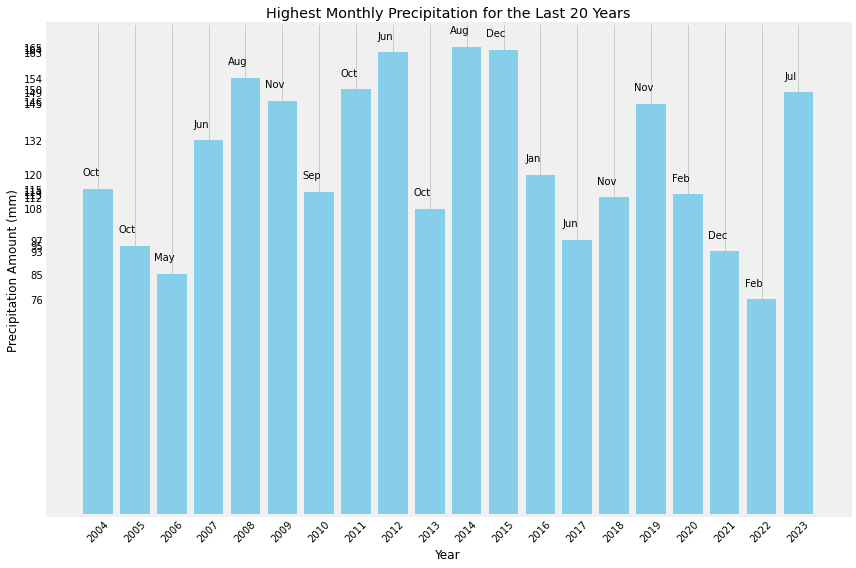

In [43]:
dfm = pd.read_csv('max_rain_months.csv')
dfm_last_20_years = dfm[dfm['Year'] >= 2004]

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

dfm_last_20_years['Month'] = dfm_last_20_years['Month'].apply(lambda x: month_names[int(x) - 1])

max_rain_months = dfm_last_20_years.groupby('Year')['Month'].first().reset_index()

plt.figure(figsize=(12,8))

bars = plt.bar(dfm_last_20_years['Year'].astype(str), dfm_last_20_years['Precipitation_Amount'], color='skyblue')

for i, bar in enumerate(bars):
    if max_rain_months['Month'].iloc[i] in month_names:
        month_idx = month_names.index(max_rain_months['Month'].iloc[i])
        month_abbr = calendar.month_abbr[month_idx + 1]
        plt.text(bar.get_x() + bar.get_width()/2 - 0.2, bar.get_height() + 4,
                 month_abbr, ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Year')
plt.ylabel('Precipitation Amount (mm)')
plt.title('Highest Monthly Precipitation for the Last 20 Years')
plt.xticks(rotation=45)
plt.yticks(dfm_last_20_years['Precipitation_Amount'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Precipitation is shown over rolling 31-day periods centered on each day of the year to show not only monthly totals but also variation within months. There is some seasonal variation in monthly rainfall in Dublin.

Rainfall throughout the year in Dublin. We can say that the rainiest months in the Dublin region are,June, July, August.

The least rainy month in Dublin is April. We can't see this month on the chart.

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [45]:
df.head()

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days,date,Year_Month
0,1941,1,112,13,18,18,1941-01-01,1941-1
1,1941,2,69,13,22,15,1941-02-01,1941-2
2,1941,3,111,50,21,13,1941-03-01,1941-3
3,1941,4,68,16,15,12,1941-04-01,1941-4
4,1941,5,66,20,13,10,1941-05-01,1941-5


We are preparing the dataset as a data set in which only the years and Precipitation Amount data are arranged and all the data can be used. In future studies, the data set will be selected according to the situation that is desired to be examined with this data set.

In [46]:
#Accordingly, we change the dates according to usage style.

import datetime

df['date'] = pd.to_datetime(df['date'])

# "Mon Apr 06 1941" formatında yeni bir sütun oluşturma
df['new_date'] = df['date'].dt.strftime('%a %b %d %Y')

# Veriyi gösterme
print(df)

     Year  Month  Precipitation_Amount  Greatest_Daily_Fall  \
0    1941      1                   112                   13   
1    1941      2                    69                   13   
2    1941      3                   111                   50   
3    1941      4                    68                   16   
4    1941      5                    66                   20   
..    ...    ...                   ...                  ...   
958  2023      5                    42                   16   
959  2023      6                    31                    8   
960  2023      7                   149                   25   
961  2023      8                   118                   35   
962  2023      9                   104                   18   

     Number_of_Rainy_Days  Number_of_Wet_Days       date Year_Month  \
0                      18                  18 1941-01-01     1941-1   
1                      22                  15 1941-02-01     1941-2   
2                      21     

In [47]:
df.head(2)

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days,date,Year_Month,new_date
0,1941,1,112,13,18,18,1941-01-01,1941-1,Wed Jan 01 1941
1,1941,2,69,13,22,15,1941-02-01,1941-2,Sat Feb 01 1941


In [48]:
df1= df.drop(["Year","Month","Greatest_Daily_Fall", "Number_of_Rainy_Days","Number_of_Wet_Days","date","Year_Month" ],axis=1)

In [49]:
df1.head(2)

,Precipitation_Amount,new_date
0,112,Wed Jan 01 1941
1,69,Sat Feb 01 1941


# BUNA BAK

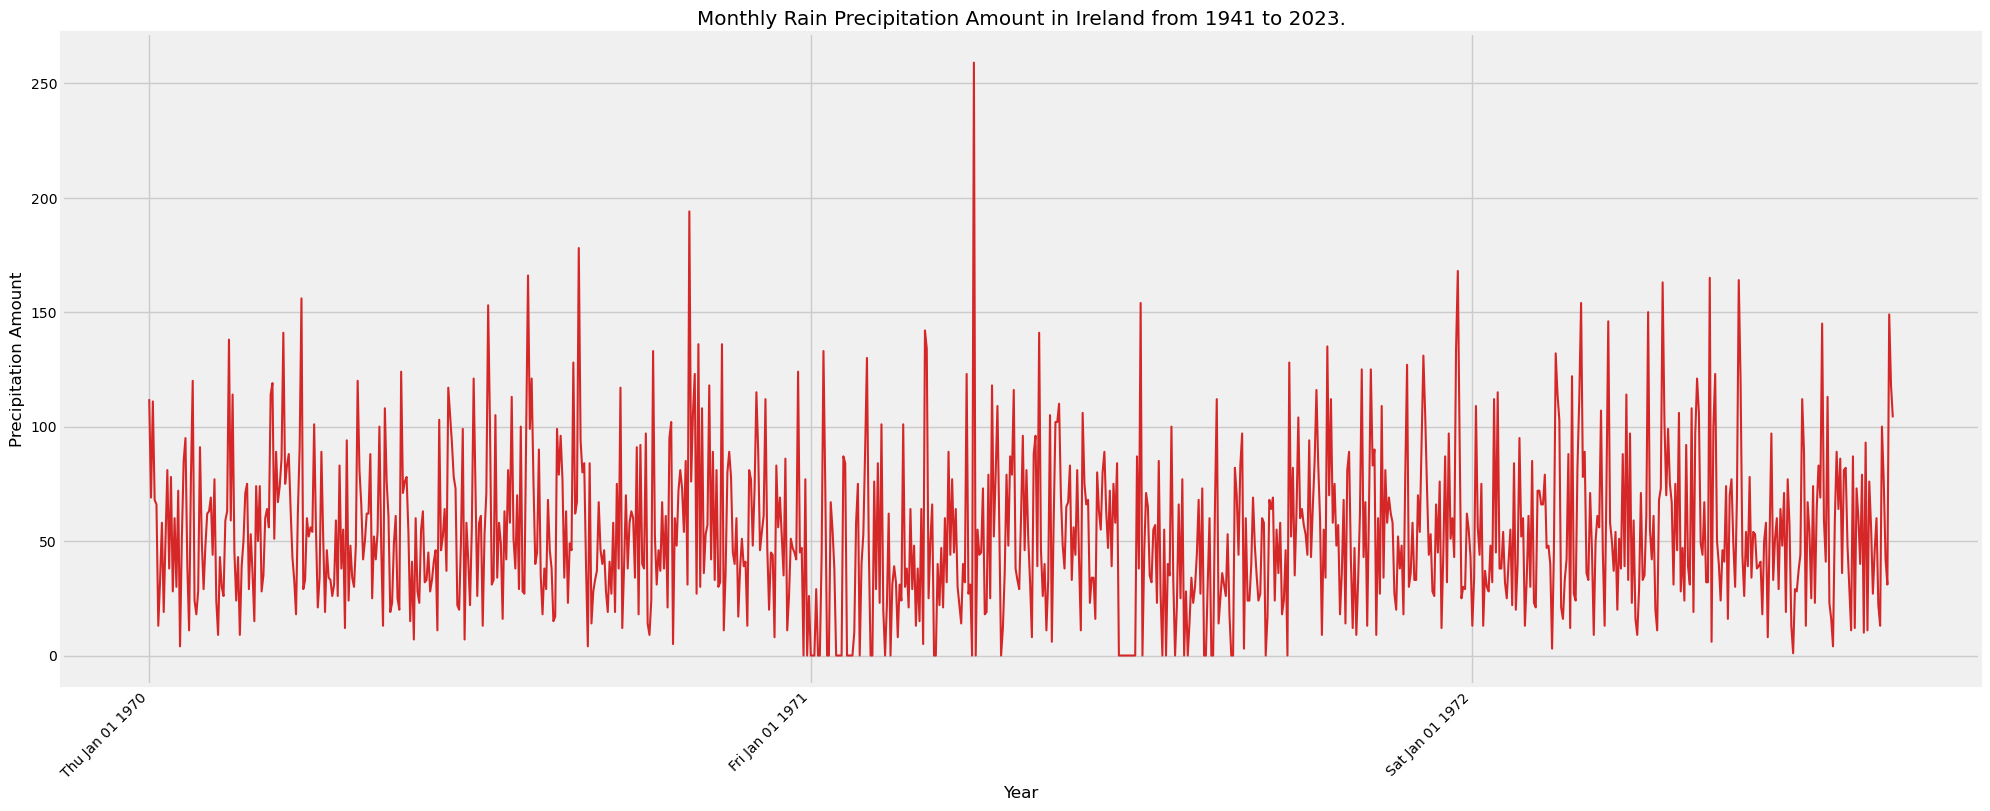

In [50]:
import matplotlib.dates as mdates
import matplotlib.dates as mdates 

def plot_df(df, x, y, title="", xlabel='Year', ylabel='Precipitation Amount', dpi=100):
    plt.figure(figsize=(20, 8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %b %d %Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gcf().autofmt_xdate()
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

x = df['new_date'].values
y = df['Precipitation_Amount'].values

plot_df(df, x=x, y=y, title='Monthly Rain Precipitation Amount in Ireland from 1941 to 2023.')

In [51]:
df.head()

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days,date,Year_Month,new_date
0,1941,1,112,13,18,18,1941-01-01,1941-1,Wed Jan 01 1941
1,1941,2,69,13,22,15,1941-02-01,1941-2,Sat Feb 01 1941
2,1941,3,111,50,21,13,1941-03-01,1941-3,Sat Mar 01 1941
3,1941,4,68,16,15,12,1941-04-01,1941-4,Tue Apr 01 1941
4,1941,5,66,20,13,10,1941-05-01,1941-5,Thu May 01 1941


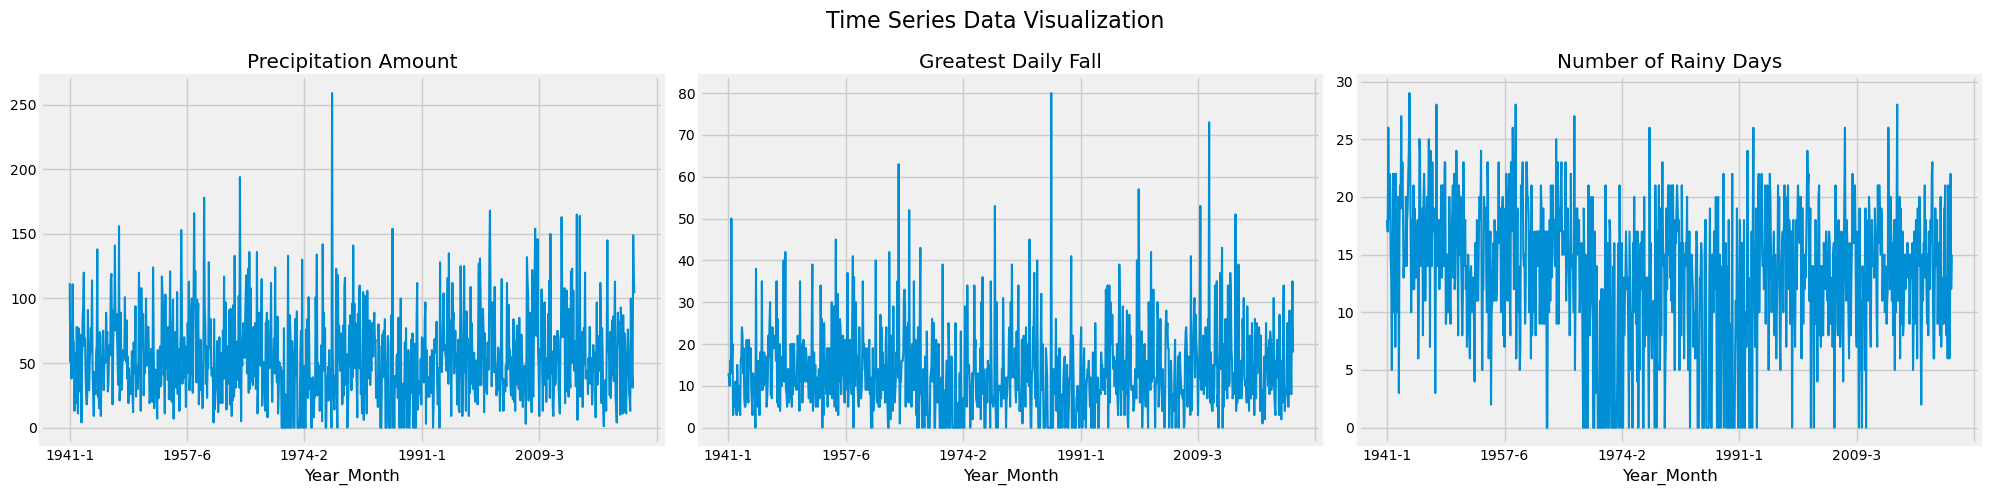

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=100)

df.groupby('Year_Month')['Precipitation_Amount'].mean().plot(title='Precipitation Amount', legend=False, ax=axes[0])

df.groupby('Year_Month')['Greatest_Daily_Fall'].mean().plot(title='Greatest Daily Fall', legend=False, ax=axes[1])

df.groupby('Year_Month')['Number_of_Rainy_Days'].mean().plot(title='Number of Rainy Days', legend=False, ax=axes[2])

plt.suptitle('Time Series Data Visualization', fontsize=16)
plt.tight_layout()
plt.show()

array([[<AxesSubplot:title={'center':'Precipitation_Amount'}>]],
      dtype=object)

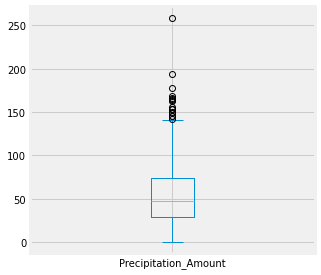

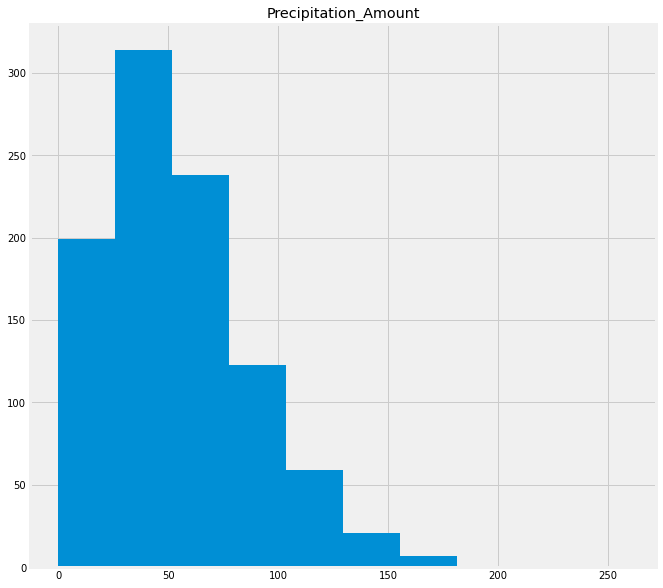

In [53]:
# Check the columns of the dataframe
df1.columns

# Check the datatypes of the columns
df1.dtypes

# Check the missing values
df1.isnull().sum()

# Check the unique values of the columns
df1.nunique()

# Check the value counts of the columns
df1['Precipitation_Amount'].value_counts()

# Check the percentage of the value counts of the columns
df1['Precipitation_Amount'].value_counts(normalize=True)

# Check the summary statistics of the dataframe
df1.describe(include='all')

# Check the outliers
df1.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))

# Check the distribution of the columns
df1.hist(figsize=(10,10))

In [54]:
# Convert the full_date column to datetime datatype
df1['new_date'] = pd.to_datetime(df1['new_date'])

In [55]:
# Print the rows of the dataframe where the Precipitation_Amount is Null
df1[df1['Precipitation_Amount'].isnull()]      

,Precipitation_Amount,new_date


In [56]:
# Group the dataframe by new_date and calculate the mean of the Precipitation_Amount
df1 = df1.groupby('new_date').mean().reset_index()

In [57]:
# Check the dataframe
print(df1.head(3))
print(df1.tail(3))

    new_date  Precipitation_Amount
0 1941-01-01                 112.0
1 1941-02-01                  69.0
2 1941-03-01                 111.0
      new_date  Precipitation_Amount
960 2023-07-01                 149.0
961 2023-08-01                 118.0
962 2023-09-01                 104.0


In [58]:
# Find the missing dates in the dataframe and insert them, leaving the Precipitation_Amount column as Null
idx = pd.date_range('1941-01-01', '2023-09-01')
df1 = df1.set_index('new_date').reindex(idx).rename_axis('new_date').reset_index()

# Check the dataframe
print(df1.head(3))

    new_date  Precipitation_Amount
0 1941-01-01                 112.0
1 1941-01-02                   NaN
2 1941-01-03                   NaN


In [59]:
# Fill in the null values using interpolation
df1['Precipitation_Amount'] = df1['Precipitation_Amount'].interpolate(method='linear')

Shape: 
(30194, 2)

Columns: 
Index(['new_date', 'Precipitation_Amount'], dtype='object')

Data Types: 
new_date                datetime64[ns]
Precipitation_Amount           float64
dtype: object

Missing Values: 
new_date                0
Precipitation_Amount    0
dtype: int64

Unique Values: 
new_date                30194
Precipitation_Amount    10665
dtype: int64

Value Counts: 
Precipitation_Amount
0.000000      755
33.000000      76
38.000000      72
34.000000      69
24.000000      62
             ... 
140.933333      1
141.200000      1
141.466667      1
141.733333      1
105.806452      1
Name: count, Length: 10665, dtype: int64

Percentage of Value Counts: 
Precipitation_Amount
0.000000      0.025005
33.000000     0.002517
38.000000     0.002385
34.000000     0.002285
24.000000     0.002053
                ...   
140.933333    0.000033
141.200000    0.000033
141.466667    0.000033
141.733333    0.000033
105.806452    0.000033
Name: proportion, Length: 10665, dtype: float64

Su

Precipitation_Amount    AxesSubplot(0.08,0.536818;0.395455x0.343182)
dtype: object

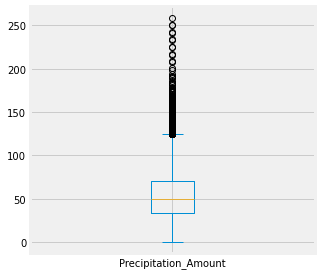

In [60]:
# Perform EDA on the df1 

print("Shape: ")
print(df1.shape)
print("\n" + "Columns: ")
print(df1.columns)
print("\n" + "Data Types: ")
print(df1.dtypes)
print("\n" + "Missing Values: ")
print(df1.isnull().sum())
print("\n" + "Unique Values: ")
print(df1.nunique())
print("\n" + "Value Counts: ")
print(df1['Precipitation_Amount'].value_counts())
print("\n" + "Percentage of Value Counts: ")
print(df1['Precipitation_Amount'].value_counts(normalize=True))
print("\n" + "Summary Statistics: ")
df1.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))

In [61]:
# Describe the df1

df1.describe(include='all')

,new_date,Precipitation_Amount
count,30194,30194.000000
mean,1982-05-02 12:00:00.000000064,53.848745
min,1941-01-01 00:00:00,0.000000
25%,1961-09-01 06:00:00,33.548387
50%,1982-05-02 12:00:00,50.258065
75%,2002-12-31 18:00:00,70.032258
max,2023-09-01 00:00:00,259.000000
std,NaN,29.125950


## Time Series Analysis

### Data Processing

In [62]:
#pip install statsmodels

In [63]:
from statsmodels.tsa.stattools import adfuller
# Create a function to check the stationarity of the time series
def check_stationarity(timeseries):
    
    # Calculate the rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # Plot the rolling statistics
    plt.figure(figsize=(20,10))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.xlabel('Date')
    plt.ylabel('Precipitation Amount')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    date_index = timeseries.index
    plt.xticks(date_index, rotation=45)
    plt.legend()
    plt.show()
    
    # Perform the Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    df1test = adfuller(timeseries, autolag='AIC')
    df1output = pd.Series(df1test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in df1test[4].items():
        df1output['Critical Value (%s)'%key] = value
    print(df1output)
    
    # Print whether the time series is stationary or not, based on the p-value
    if df1output[1] <= 0.05:
        print('The time series is stationary.')
    else:
        print('The time series is not stationary.')

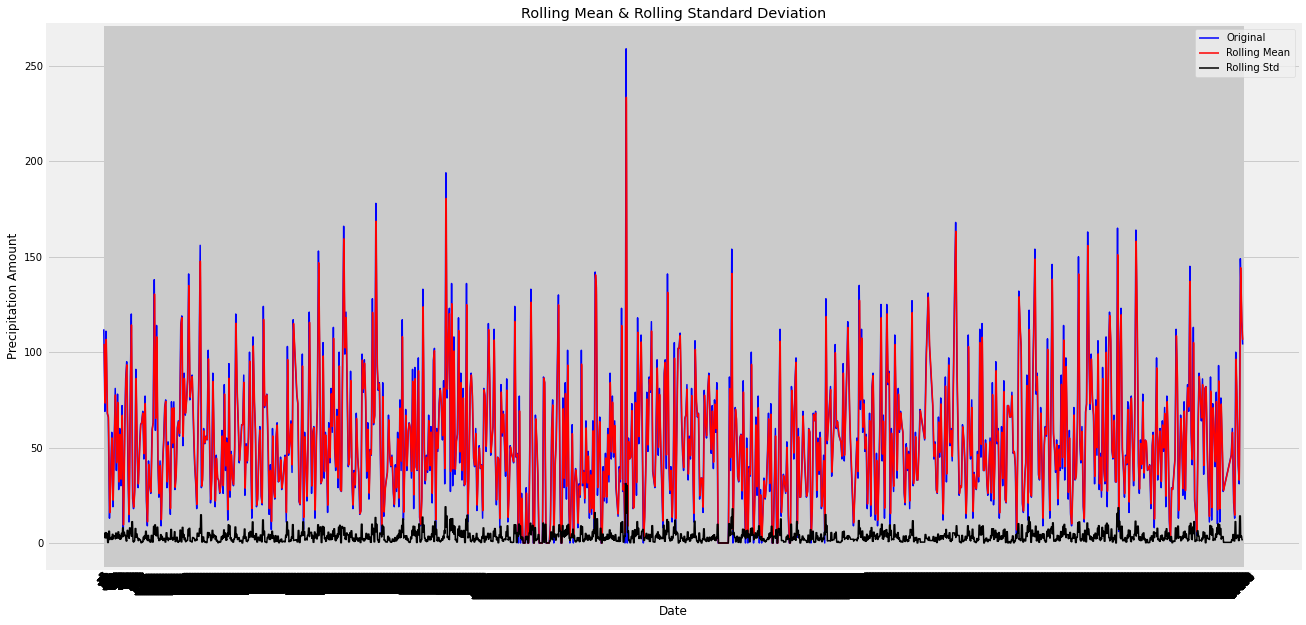

Results of Dickey-Fuller Test:
Test Statistic                -1.503038e+01
p-value                        9.922827e-28
#Lags Used                     5.100000e+01
Number of Observations Used    3.014200e+04
Critical Value (1%)           -3.430567e+00
Critical Value (5%)           -2.861636e+00
Critical Value (10%)          -2.566821e+00
dtype: float64
The time series is stationary.


In [64]:
# Check the stationarity of the time series
check_stationarity(df1['Precipitation_Amount'])

According to the Dickey-Fuller unit root test results, we can conclude that your data set is stationary. This means that the time series exhibits statistically stable behavior and there is no particular trend or fluctuation over time. We can use these results in future modeling and forecasting studies to ensure that the stationarity assumption is met.

In [65]:
from statsmodels.tsa.stattools import kpss
# KPSS Test
def kpss_test(timeseries):
    print('KPSS Test:')
    result = kpss(timeseries, regression='c', nlags='auto')
    labels = ['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations']
    for value, label in zip(result, labels):
        print(label + ': ' + str(value))
    if result[1] <= 0.05:
        print("Result: The time series is non-stationary as the p-value is less than the significance level (0.05).")
    else:
        print("Result: The time series is stationary as the p-value is greater than the significance level (0.05).")

# Apply the test using the 'Precipitation_Amount' column
kpss_test(df1['Precipitation_Amount'])

KPSS Test:
Test Statistic: 0.3252076084397214
p-value: 0.1
Lags Used: 99
Number of Observations: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Result: The time series is stationary as the p-value is greater than the significance level (0.05).


/tmp/ipykernel_8919/2305898266.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(timeseries, regression='c', nlags='auto')


According to the KPSS test results, it can be said that the time series is stationary and does not contain any statistically significant change. This means that the time series remains constant around a certain mean and variance over time.

Since the time series is stationary, differentiating or any other method will not be used to make it stationary.

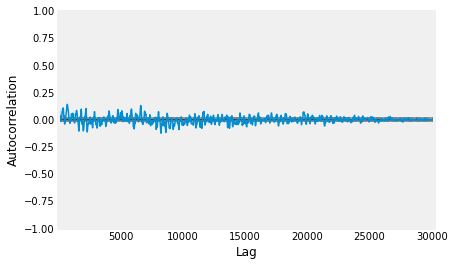

In [66]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df1['Precipitation_Amount'])
plt.show() 

## ARIMA MODEL

In [67]:
#pip install pmdarima

In [68]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df1['Precipitation_Amount'],order=(1,1,1))
model_fit=model.fit() 

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Precipitation_Amount   No. Observations:                30194
Model:                   ARIMA(1, 1, 1)   Log Likelihood              -19493.426
Date:                  Wed, 03 Apr 2024   AIC                          38992.852
Time:                          03:47:55   BIC                          39017.798
Sample:                               0   HQIC                         39000.854
                                - 30194                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9490      0.004    250.578      0.000       0.942       0.956
ma.L1          0.0249      0.056      0.441      0.659      -0.086       0.136
sigma2         0.2129      0.001    372.679      0.000       0.212       0.214
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):          27487737.60
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -2.54
Prob(H) (two-sided):                  0.00   Kurtosis:                       150.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

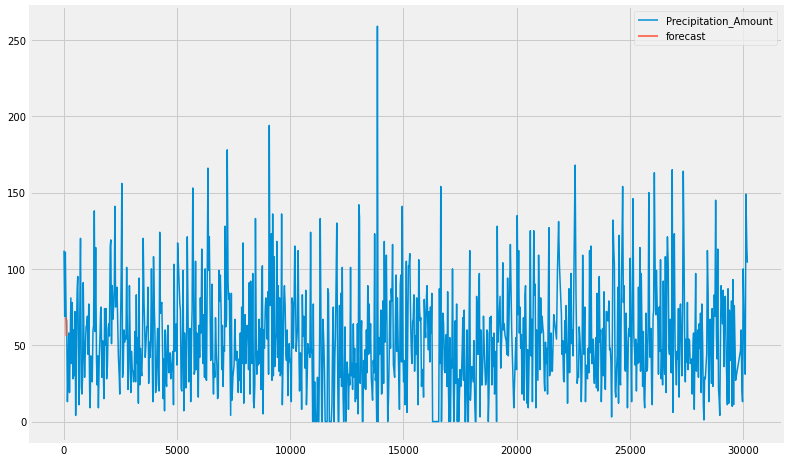

In [69]:
df1['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df1[['Precipitation_Amount','forecast']].plot(figsize=(12,8))

Here we can see that the prediction using ARIMA is not good as the time series shows seasonality.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.34984D-01    |proj g|=  3.79032D-01

At iterate    5    f=  7.27098D-01    |proj g|=  2.80250D-01

At iterate   10    f=  6.56476D-01    |proj g|=  5.83825D-02

At iterate   15    f=  6.49795D-01    |proj g|=  5.04195D-03

At iterate   20    f=  6.48437D-01    |proj g|=  3.03439D-02

At iterate   25    f=  6.46825D-01    |proj g|=  1.70316D-02

At iterate   30    f=  6.46631D-01    |proj g|=  2.19823D-03

At iterate   35    f=  6.46614D-01    |proj g|=  2.27552D-03

At iterate   40    f=  6.46611D-01    |proj g|=  1.32743D-03

At iterate   45    f=  6.46611D-01    |proj g|=  1.56167D-04

At iterate   50    f=  6.46611D-01    |proj g|=  3.26327D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number

/home/hduser/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

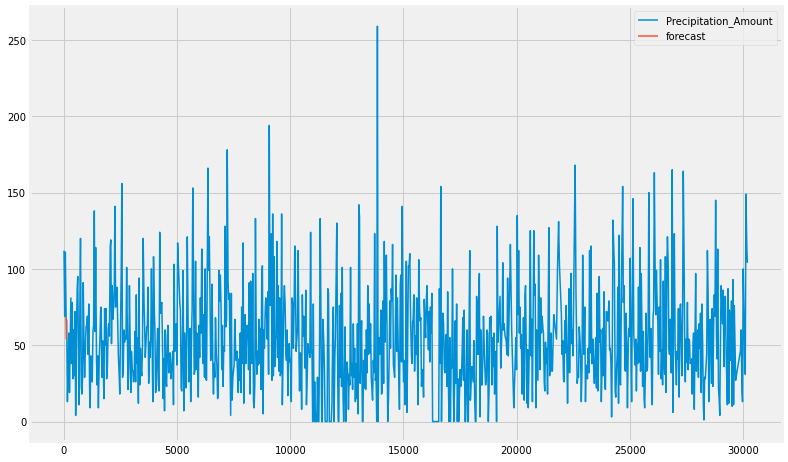

In [70]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df1['Precipitation_Amount'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df1['forecast']=results.predict(start=90,end=103,dynamic=True)
df1[['Precipitation_Amount','forecast']].plot(figsize=(12,8))

### Df2

Unfortunately, I could not use the relevant method due to the large amount of data in my dataset. I decided to reduce the dataset in order to deep dive and see the harmony between predictions and actual values. Accordingly, I will try to make predictions with the data of the last 20 years. First of all, I limit my dataset to the last 20 years.

In [71]:
current_year = pd.Timestamp.now().year

start_year = current_year - 20

df2 = df1[df1['new_date'].dt.year >= start_year]

print(df2)

        new_date  Precipitation_Amount  forecast
23010 2004-01-01             75.000000       NaN
23011 2004-01-02             73.000000       NaN
23012 2004-01-03             71.000000       NaN
23013 2004-01-04             69.000000       NaN
23014 2004-01-05             67.000000       NaN
...          ...                   ...       ...
30189 2023-08-28            105.806452       NaN
30190 2023-08-29            105.354839       NaN
30191 2023-08-30            104.903226       NaN
30192 2023-08-31            104.451613       NaN
30193 2023-09-01            104.000000       NaN

[7184 rows x 3 columns]


In [72]:
# Create a function to check the stationarity of the time series
def check_stationarity(timeseries):
    
    # Calculate the rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # Plot the rolling statistics
    plt.figure(figsize=(20,10))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.xlabel('Year')
    plt.ylabel('Precipitation Amount')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Date format
    plt.show()
    
    # Perform the Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    df2test = adfuller(timeseries, autolag='AIC')
    df2output = pd.Series(df2test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in df2test[4].items():
        df2output['Critical Value (%s)'%key] = value
    print(df2output)
    
    # Print whether the time series is stationary or not, based on the p-value
    if df2output[1] <= 0.05:
        print('The time series is stationary.')
    else:
        print('The time series is not stationary.')

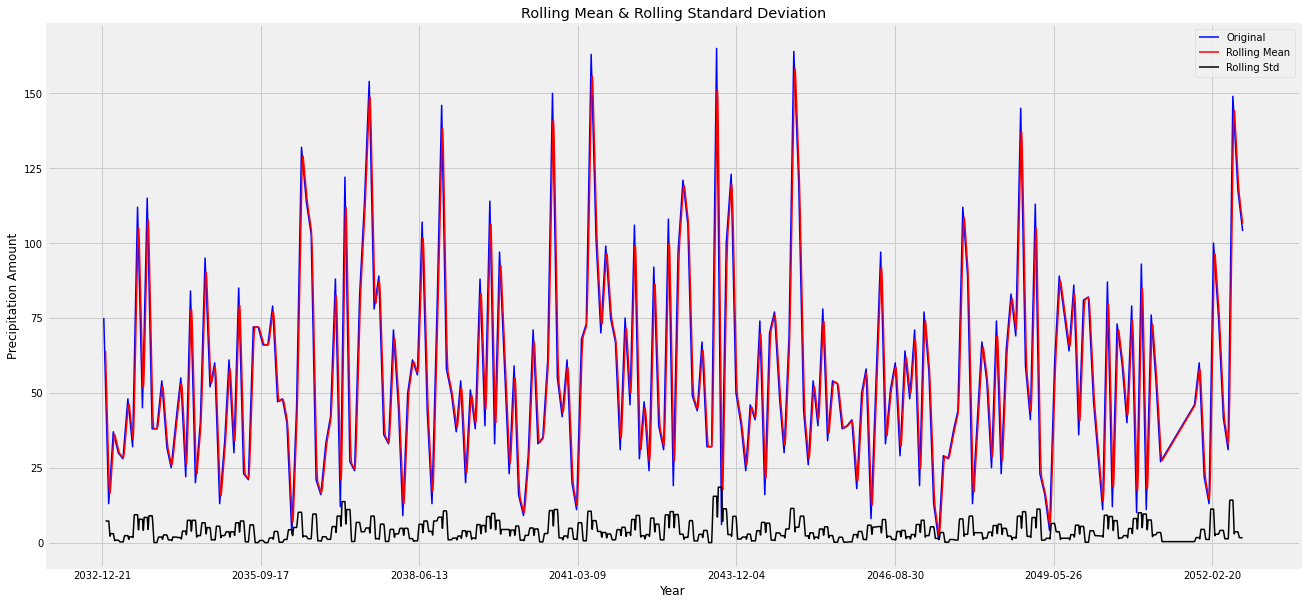

Results of Dickey-Fuller Test:
Test Statistic                -1.038361e+01
p-value                        2.107753e-18
#Lags Used                     3.300000e+01
Number of Observations Used    7.150000e+03
Critical Value (1%)           -3.431265e+00
Critical Value (5%)           -2.861944e+00
Critical Value (10%)          -2.566985e+00
dtype: float64
The time series is stationary.


In [73]:
# Check the stationarity of the time series
check_stationarity(df2['Precipitation_Amount'])

### Decomposition is a useful technique for removing trend and seasonality from a time series since the time period is 252 months (7.560 days) and the period is 21.

Since there are 12 months for each year, we can calculate the total number of months as:

Total Number of Months=(End Year−Start Year+1)×12Total Number of Months=(End Year−Start Year+1)×12

The data from 2003 to 2023:

Total Number of Months=(2023−2003+1)×12=21×12=252 months

Total Number of Periods=Total Number of Months/12Total Number of Periods=Total Number of Months/12

Total Number of Periods=252 months/12=21 periods

These calculations will provide the total number of months and the number of periods for the data from 2003 to 2023, given

that there are data for each of the 12 months of each year.

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df2['Precipitation_Amount'], period=21)

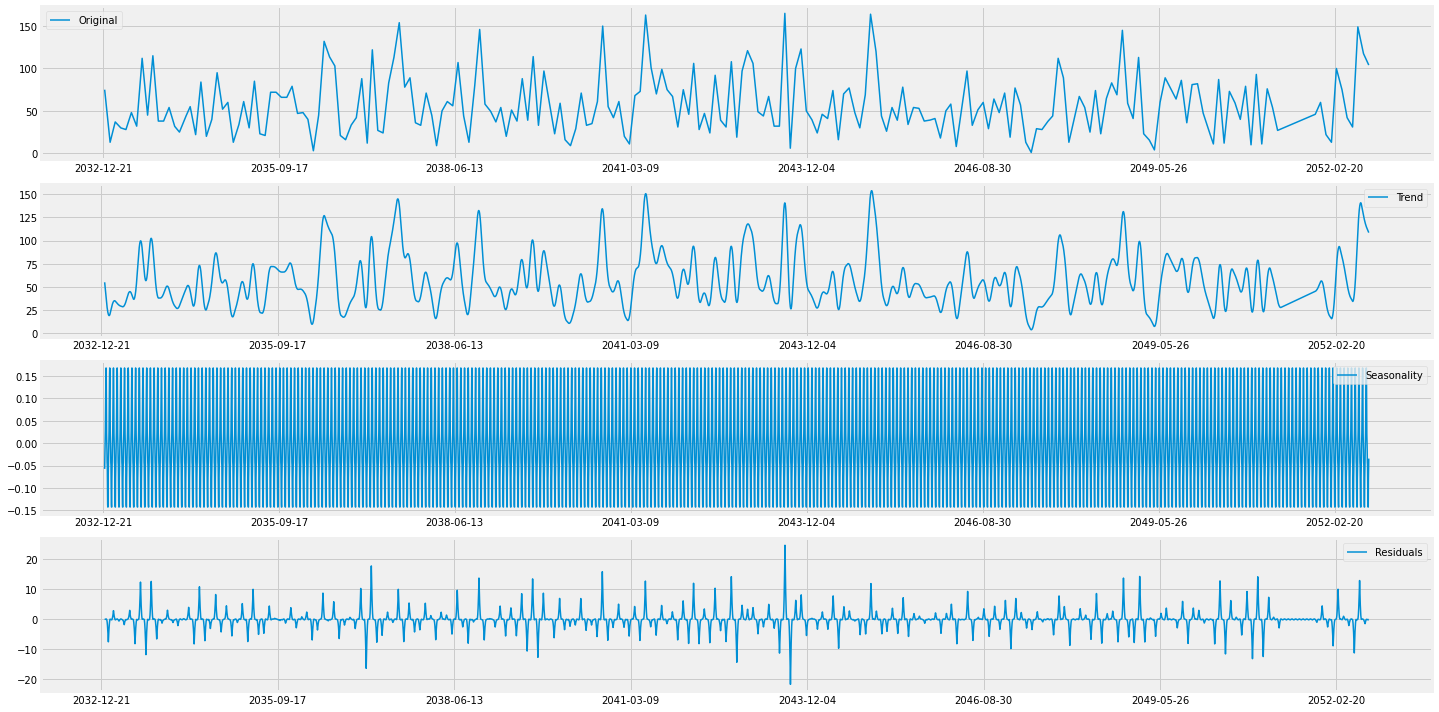

In [75]:
# Plot the original time series, the trend, the seasonality, and the residuals
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df2['Precipitation_Amount'], label='Original')
plt.legend(loc='best')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.tight_layout()
plt.show()


In [76]:
# Create a fuction to plot the ACF and PACF plots
def plot_acf_pacf(timeseries):
    plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(acf(timeseries, nlags=20))
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.title('Autocorrelation Function')
    plt.subplot(212)
    plt.plot(pacf(timeseries, nlags=20))
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
    plt.show()

In [77]:
from statsmodels.tsa.stattools import acf
from pandas.plotting import autocorrelation_plot

In [78]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

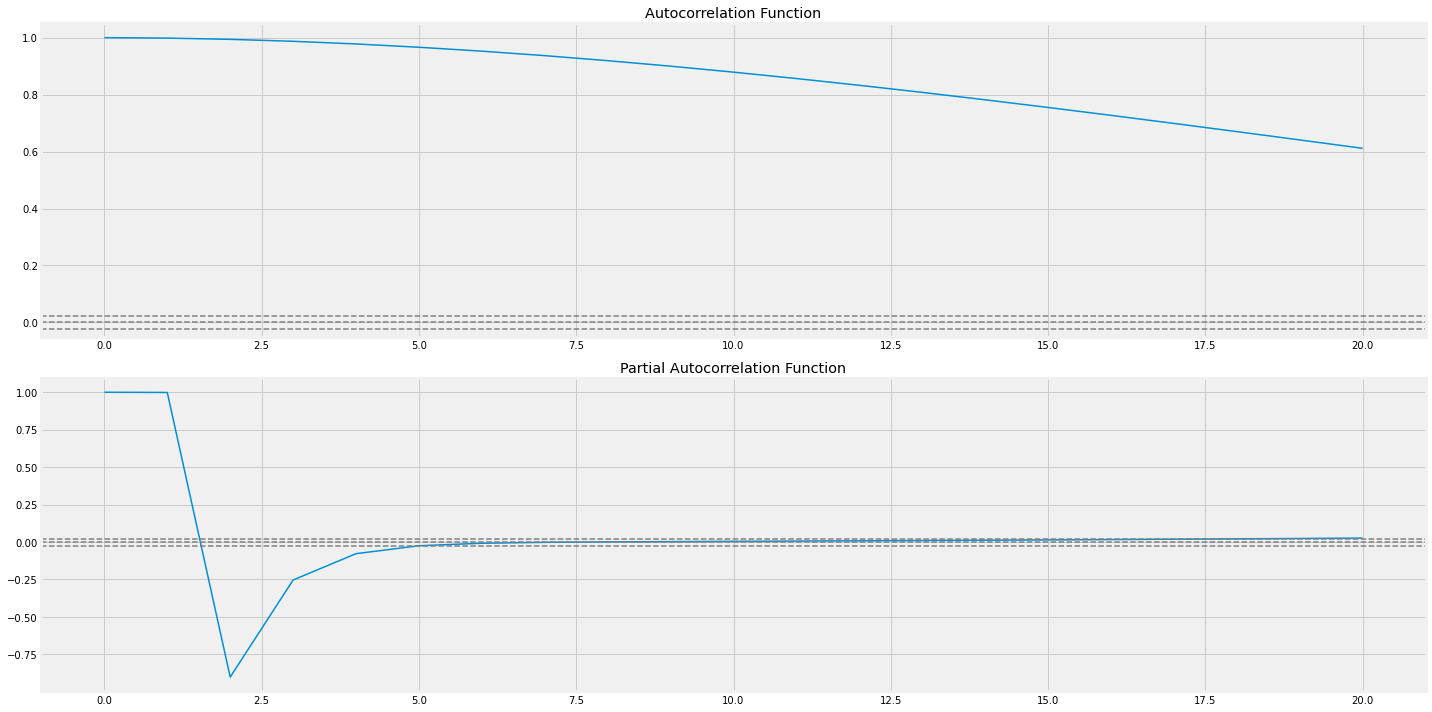

In [79]:
#Plot the ACF and PACF plots for the stationary time series columns
plot_acf_pacf(df2['Precipitation_Amount'])

In [80]:
print(adfuller(df2['Precipitation_Amount'])[1])

2.1077530561990594e-18


## df2: ARIMA MODEL

In [81]:
df2 = df1[['new_date', 'Precipitation_Amount']]

new_date                0
Precipitation_Amount    0
dtype: int64

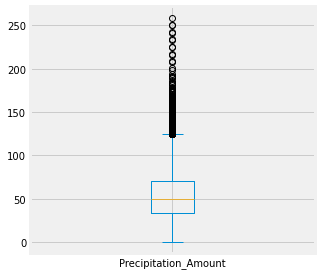

In [82]:
# Check the dataframe for outliers and missing values
df2.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))
df2.isnull().sum()

In [83]:
current_year = pd.Timestamp.now().year

start_year = current_year - 20

df2 = df1[df1['new_date'].dt.year >= start_year]

print(df2)

        new_date  Precipitation_Amount  forecast
23010 2004-01-01             75.000000       NaN
23011 2004-01-02             73.000000       NaN
23012 2004-01-03             71.000000       NaN
23013 2004-01-04             69.000000       NaN
23014 2004-01-05             67.000000       NaN
...          ...                   ...       ...
30189 2023-08-28            105.806452       NaN
30190 2023-08-29            105.354839       NaN
30191 2023-08-30            104.903226       NaN
30192 2023-08-31            104.451613       NaN
30193 2023-09-01            104.000000       NaN

[7184 rows x 3 columns]


In [84]:
# Check the dataframe
print(len(df2))
print(round(len(df2)*.8))
print(len(df2) - round(len(df2)*.8))

7184
5747
1437


In [85]:
df2.describe(include='all')

,new_date,Precipitation_Amount,forecast
count,7184,7184.000000,0.0
mean,2013-10-31 12:00:00,56.482948,NaN
min,2004-01-01 00:00:00,1.000000,NaN
25%,2008-11-30 18:00:00,36.233567,NaN
50%,2013-10-31 12:00:00,50.803226,NaN
75%,2018-10-01 06:00:00,71.774194,NaN
max,2023-09-01 00:00:00,165.000000,NaN
std,NaN,28.693399,NaN


(5747, 3)
(1437, 3)
Train dates : 23010 --- 28756  (n=5747)
Test dates  : 28757 --- 30193  (n=1437)


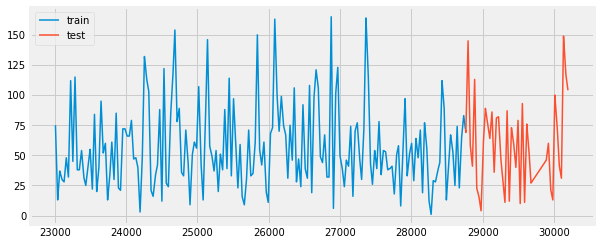

In [86]:
steps = 1437
train = df2[:-steps]
test  = df1[-steps:]

print(train.shape)
print(test.shape)

print(f"Train dates : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(f"Test dates  : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

fig, ax=plt.subplots(figsize=(9, 4))
train['Precipitation_Amount'].plot(ax=ax, label='train')
test['Precipitation_Amount'].plot(ax=ax, label='test')
ax.legend()


In [87]:
data = np.asarray(df2['Precipitation_Amount'])

# ARIMA modelini oluşturma
model = ARIMA(data, order=(1, 1, 1))

# Modeli uyumlama
model_fit = model.fit()

# Model özetini görüntüleme
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7184
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4740.340
Date:                Wed, 03 Apr 2024   AIC                           9486.680
Time:                        03:49:50   BIC                           9507.319
Sample:                             0   HQIC                          9493.783
                               - 7184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9495      0.010     92.278      0.000       0.929       0.970
ma.L1          0.0246      0.154      0.160      0.873      -0.277       0.327
sigma2         0.2191      0.002    137.067      0.0

In [88]:
# Tune the ARIMA model
# Create a function to find the best ARIMA model
def find_best_arima_model(train, p_values, d_values, q_values):
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = ARIMA(train, order=order)
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_score:
                        best_score, best_cfg = aic, order
                    print('ARIMA%s AIC=%.3f' % (order, aic))
                except:
                    continue
    print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))
    return best_cfg


In [89]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_pdq = None

for param in pdq:
    try:
        model = sm.tsa.ARIMA(df2['Precipitation_Amount'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print("Best ARIMA{} AIC={}".format(best_pdq, best_aic))

/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored 

Best ARIMA(2, 0, 0) AIC=9293.879790224928


In [90]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_pdq = None

for param in pdq:
    try:
        model = sm.tsa.ARIMA(df2['Precipitation_Amount'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print("Best ARIMA{} AIC={}".format(best_pdq, best_aic))

model = sm.tsa.ARIMA(df2['Precipitation_Amount'], order=best_pdq)
results = model.fit()
forecast = results.predict(start=0, end=len(df2)-1, typ='levels')

print(results.summary())

/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored 

Best ARIMA(2, 0, 0) AIC=9293.879790224928


/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                SARIMAX Results                                 
Dep. Variable:     Precipitation_Amount   No. Observations:                 7184
Model:                   ARIMA(2, 0, 0)   Log Likelihood               -4642.940
Date:                  Wed, 03 Apr 2024   AIC                           9293.880
Time:                          03:50:34   BIC                           9321.398
Sample:                               0   HQIC                          9303.350
                                 - 7184                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.4829      2.182     25.886      0.000      52.206      60.760
ar.L1          1.9505      0.006    313.937      0.000       1.938       1.963
ar.L2         -0.9533      0.006   -

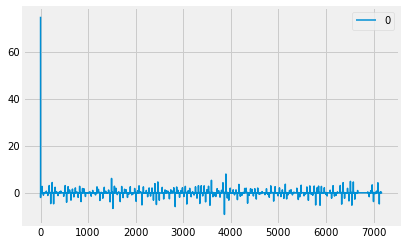

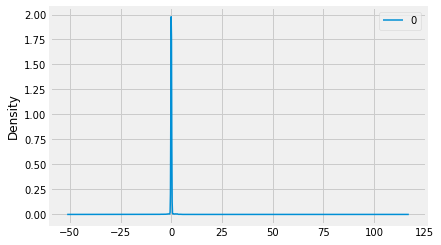

                 0
count  7184.000000
mean      0.010574
std       1.001284
min      -9.208003
25%      -0.049262
50%      -0.003284
75%       0.049262
max      75.000000


In [91]:
# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [92]:
# Generate predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

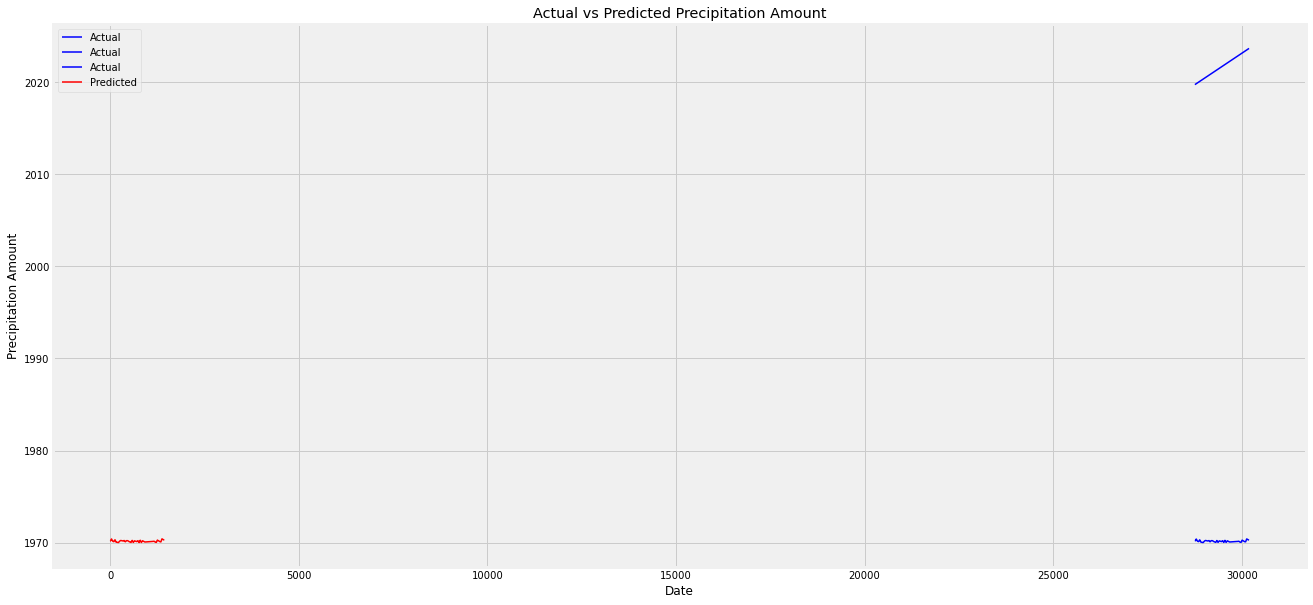

In [93]:
def plot_predictions(predictions, test):
    plt.figure(figsize=(20, 10))
    plt.plot(test, label='Actual', color='blue')
    plt.plot(predictions, label='Predicted', color='red')
    plt.xlabel('Date')
    plt.ylabel('Precipitation Amount')
    plt.title('Actual vs Predicted Precipitation Amount')
    plt.legend()
    plt.show()

plot_predictions(predictions, test)

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def calculate_metrics(predictions, test):
    rmse = np.sqrt(mean_squared_error(test['Precipitation_Amount'], predictions))
    mape = np.mean(np.abs((test['Precipitation_Amount'] - predictions) / test['Precipitation_Amount'])) * 100
    mae = mean_absolute_error(test['Precipitation_Amount'], predictions)
    r2 = r2_score(test['Precipitation_Amount'], predictions)
    
    print('Root Mean Squared Error (RMSE):', rmse)
    print('Mean Absolute Percentage Error (MAPE):', mape)
    print('Mean Absolute Error (MAE):', mae)
    print('R-squared (R2) Score:', r2)

calculate_metrics(predictions, test)

Root Mean Squared Error (RMSE): 0.48859288346285934
Mean Absolute Percentage Error (MAPE): 0.32979752913584787
Mean Absolute Error (MAE): 0.12107680429835344
R-squared (R2) Score: 0.9997155113444585


In [95]:
df2.head()

,new_date,Precipitation_Amount,forecast
23010,2004-01-01,75.0,NaN
23011,2004-01-02,73.0,NaN
23012,2004-01-03,71.0,NaN
23013,2004-01-04,69.0,NaN
23014,2004-01-05,67.0,NaN


In [96]:
next_year_predictions = model_fit.predict(start=len(df2), end=len(df2) + 365, typ='levels')

next_year_dates = pd.date_range(start=df2['new_date'].max() + pd.Timedelta(days=1), periods=366)
next_year_predictions_df2 = pd.DataFrame(next_year_predictions, columns=['Predicted_Precipitation'])
next_year_predictions_df2['new_date'] = next_year_dates
next_year_predictions_df2.set_index('new_date', inplace=True)
print(next_year_predictions_df2)

            Predicted_Precipitation
new_date                           
2023-09-02               103.570635
2023-09-03               103.162942
2023-09-04               102.775827
2023-09-05               102.408253
2023-09-06               102.059231
...                             ...
2024-08-28                95.493583
2024-08-29                95.493583
2024-08-30                95.493583
2024-08-31                95.493583
2024-09-01                95.493583

[366 rows x 1 columns]


In [97]:
df2.head()

,new_date,Precipitation_Amount,forecast
23010,2004-01-01,75.0,NaN
23011,2004-01-02,73.0,NaN
23012,2004-01-03,71.0,NaN
23013,2004-01-04,69.0,NaN
23014,2004-01-05,67.0,NaN


# LSTM

In [98]:
#pip install pandas numpy scikit-learn keras

In [99]:
df2.describe()

,new_date,Precipitation_Amount,forecast
count,7184,7184.000000,0.0
mean,2013-10-31 12:00:00,56.482948,NaN
min,2004-01-01 00:00:00,1.000000,NaN
25%,2008-11-30 18:00:00,36.233567,NaN
50%,2013-10-31 12:00:00,50.803226,NaN
75%,2018-10-01 06:00:00,71.774194,NaN
max,2023-09-01 00:00:00,165.000000,NaN
std,NaN,28.693399,NaN


In [100]:
df2.head(2)

,new_date,Precipitation_Amount,forecast
23010,2004-01-01,75.0,NaN
23011,2004-01-02,73.0,NaN


In [101]:
df2['new_date'] = pd.to_datetime(df2['new_date'])
df2.set_index('new_date', inplace=True)

In [102]:
# Function to create input and target datasets
def create_dataset(data, timestep):
    X, y = [], []
    for i in range(len(data)-timestep-1):
        X.append(data[i:(i+timestep), 0])
        y.append(data[i + timestep, 0])
    return np.array(X), np.array(y)

In [103]:
# Convert data to numpy array
dataset = df2['Precipitation_Amount'].values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [104]:
# Set the timestep (how many days to look back)
timestep = 90

In [105]:
# Create input and target datasets
X, y = create_dataset(scaled_data, timestep)

In [106]:
# Split the data into training and testing sets
split_ratio = 0.8
split = int(split_ratio * len(X))

In [107]:
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [108]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [109]:
#pip install scikit-learn

In [110]:
#pip install keras

In [ ]:
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
forecast_years = 5 

In [ ]:
scaled_future_data = scaler.transform(dataset[-timestep:].reshape(-1, 1))

In [ ]:
X_future = []
for i in range(forecast_years*365):
    X_future.append(scaled_future_data[-timestep:].reshape((1, timestep, 1)))  # Reshape for LSTM input
    predicted_value = model.predict(X_future[-1])  # Predict based on last value
    scaled_future_data = np.append(scaled_future_data, predicted_value)

# Create future date range with proper indices
future_dates = pd.date_range(start=df2.index[-1] + pd.DateOffset(days=1), periods=forecast_years*365, freq='D')
future_dates = pd.DataFrame(index=future_dates, columns=['Forecast'])

future_dates['Forecast'] = scaler.inverse_transform(np.array(X_future).reshape(-1, 1))[:len(future_dates)]

In [ ]:
print("Forecasted Precipitation Amounts for Future Years:")
print(future_dates['Forecast'])